<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Частоты-слов" data-toc-modified-id="Частоты-слов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Частоты слов</a></span></li><li><span><a href="#Не-словарные-слова" data-toc-modified-id="Не-словарные-слова-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Не словарные слова</a></span></li><li><span><a href="#Количественные-оценки-записей" data-toc-modified-id="Количественные-оценки-записей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Количественные оценки записей</a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание выборок</a></span></li><li><span><a href="#Обучение-классических-моделей" data-toc-modified-id="Обучение-классических-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение классических моделей</a></span><ul class="toc-item"><li><span><a href="#Мешок-слов-(bag-of-words---BOW)" data-toc-modified-id="Мешок-слов-(bag-of-words---BOW)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Мешок слов (bag of words - BOW)</a></span></li><li><span><a href="#TF-IDF-(Term-frequency–inverse-document-frequency)" data-toc-modified-id="TF-IDF-(Term-frequency–inverse-document-frequency)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>TF-IDF (Term frequency–inverse document frequency)</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#TF-IDF-(опять)" data-toc-modified-id="TF-IDF-(опять)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>TF-IDF (опять)</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп». Идентификация токсичных комментариев

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Проект посвящен созданию модели, определяющей токсичные комментарии к правкам википедии.

Задача: построить модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузить и подготовить данные.
2. Обучить разные модели. 
3. Сделать выводы.

Для выполнения проекта применять *BERT* необязательно, но можно попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импорты всего нужного.

In [7]:
is_final = True

import warnings
warnings.filterwarnings('ignore')
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words as ntlk_words
from sklearn import model_selection, tree, linear_model, metrics, ensemble, preprocessing, neighbors, compose, naive_bayes, svm, set_config, impute, manifold, feature_selection, inspection, pipeline, decomposition, feature_extraction
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from transformers import BertTokenizer, BertModel
import phik
from sklearn.model_selection import GridSearchCV
import optuna
import string
#optuna.logging.set_verbosity(optuna.logging.INFO)
optuna.logging.set_verbosity(optuna.logging.WARNING)
import time
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler, Sampler, SequentialSampler
import regex as re
import requests
from io import BytesIO
import spacy
import gc
from IPython.display import clear_output
import catboost as cat
from catboost import Pool, cv
from unidecode import unidecode
import gensim.downloader

Настраиваем визуализации и рандом.

In [8]:
%matplotlib inline
set_config(display="diagram")
sns.set()
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_palette('pastel')
plt.rcParams["figure.figsize"] = (12, 8)

random_state = 2077
np.random.seed(seed=random_state)
torch.manual_seed(random_state);

Сразу подготовим NLTK.

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Загрузка данных

In [12]:
df = pd.read_csv('toxic_comments.csv').sample(
    frac=1, random_state=0).reset_index(drop=True)
print(df.info())
df['toxic'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None


0.10167887648758234

У нас 160к строк, из них к классу 1 относится 10%. Пропусков нет, типы данных адекватные.

Для борьбы с дисбалансом будем использовать два подхода (по возможности одновременно):
- сбалансируем веса выборок, но не просто обратно пропорционально (1 к 9), а обратно пропорционально корню из дисбаланса (то есть 1 к 3)
- будем выбирать порог принятия решения для максимизации метрики F1 на валидационной или обучающей выборке. Затем применим найденный порог на тестовой выборке

## EDA

Посмотрим на токсичные примеры.

In [13]:
for i, t in enumerate(df[df['toxic'] == 1]['text'].sample(n=3, random_state=random_state)):
    if i > 0: print('-----------------------------------------')
    print(t)

"

u are 1 ****ing cheeky **** mate i swear i am goin 2 wreck u i swear on my mums life... but seriously I'll still block you if you keep this up. Talk "
-----------------------------------------
Please make DreamGuy and his tools stop messing with my user page. I have cleaned it off in good faith and that asshole keeps putting it back
-----------------------------------------
What the HECK is a Woman Artist??? 

Is this creature somehow different from a MALE artist?  Is this creature less than a MALE artist?  What is this creature, exactly?



Теперь нулевой класс:

In [14]:
for i, t in enumerate(df[df['toxic'] == 0]['text'].sample(n=3, random_state=random_state)):
    if i > 0: print('-----------------------------------------')
    print(t)

"
I would actually agree that the product is not worthy of having a Wikipedia article. But it is a kind of flag bearer for this type of butter blend product and as such get a fair amount of media coverage which generates some general interest. Irrespective of this, if the article stands then I hope you will agree it should be informative. The most important element of that is to say what it is. 
As far as I know the product comes under the category of margarine/butter blend. I've put a reference to where a retailer describes it as this. A margarine is a ""water-in-oil emulsion derived from vegetable/animal fats ... suitable as spread"" and that's exactly what this product is. And a margarine is defined as an imitation butter spread. What the reader needs to know about this product in a nutshell is that it is a margarine product which is marketed as if it had butter in it (that it has 'butter taste'  implying a butter blend) but that it is not actually blended with natural butter. The p

### Частоты слов

Визуализируем основные слова из наборов. 

In [15]:
count_vec_fitted = feature_extraction.text.CountVectorizer(stop_words=stop_words, strip_accents='unicode', lowercase=True)
count_vec_fitted.fit(df['text'])

def word_count_barplot(toxic=None, plot=True):
    if toxic == None: tmp = df.copy()
    else: tmp = df[df['toxic'] == toxic].copy()
    count = count_vec_fitted.transform(tmp['text'])
    freq_list = np.asarray(count.sum(axis=0)).reshape(-1)
    word_list = count_vec_fitted.get_feature_names()
    count_matrix = list(zip(word_list, freq_list))
    tmp2 = pd.DataFrame(count_matrix).sort_values(1, ascending=False).rename(columns={0:'word', 1:'count'}).reset_index(drop=True)
    tmp2['freq'] = tmp2['count'] / len(tmp2)
    if plot: sns.barplot(data=tmp2.head(30), x='freq', y='word')
    return tmp2

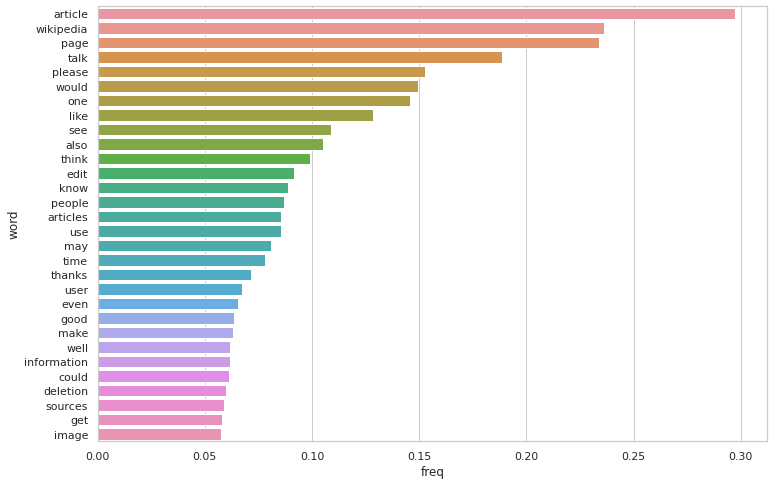

In [16]:
if is_final: word_count_barplot(toxic=0);

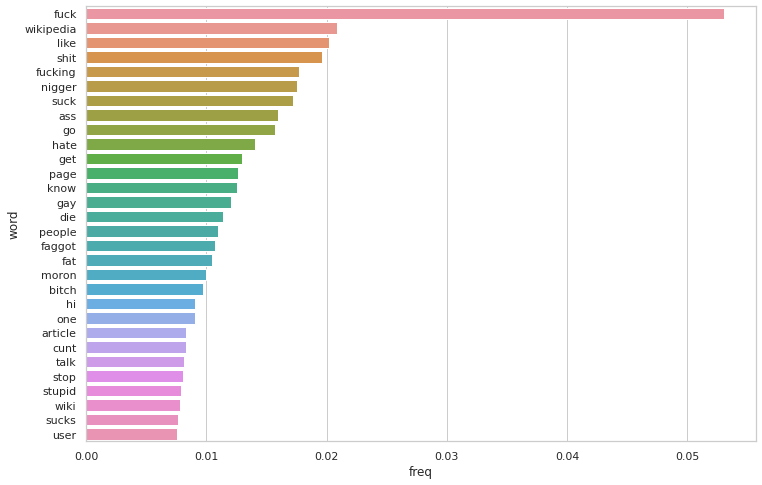

In [17]:
if is_final: word_count_barplot(1);

Теперь посмотрим, какую долю датасета занимают "популярные" слова.

Сразу проверим, какие слова входят в английские словари.

In [18]:
if is_final:
    words = word_count_barplot(None, plot=False)
    nltk.download('words')
    word_list = ntlk_words.words()
    word_list = [i.lower() for i in word_list]
    words['in_vocab'] = words['word'].isin(word_list)
    print('всего слов', len(words))
    total_words = words['count'].sum()
    for i in np.arange(0, 5):
        n = 10**i
        tmp = words[words['count'] > n]
        l = len(tmp)
        total_words_n =  tmp['count'].sum() / total_words
        print(f'слова, встречающиеся чаще {n} раз: количество, шт. {l} ({l/len(words):.1%}), формируют {total_words_n:.1%} мешка слов')

[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


всего слов 188517
слова, встречающиеся чаще 1 раз: количество, шт. 89269 (47.4%), формируют 98.2% мешка слов
слова, встречающиеся чаще 10 раз: количество, шт. 25182 (13.4%), формируют 94.0% мешка слов
слова, встречающиеся чаще 100 раз: количество, шт. 6117 (3.2%), формируют 83.5% мешка слов
слова, встречающиеся чаще 1000 раз: количество, шт. 959 (0.5%), формируют 56.0% мешка слов
слова, встречающиеся чаще 10000 раз: количество, шт. 45 (0.0%), формируют 14.2% мешка слов


Видно, что даже самые часто встречающиеся слова уже неплохо передают "окраску" комментариев.

Кроме того, видно, что есть колоссальное количество (50%) редких слов, которые встречаются всего по 1 разу - они, вероятно, бесполезны, модель будет просто переобучаться на них.

### Не словарные слова

Посмотрим, какие слова не входят в английский словарь.

In [19]:
words[(words['in_vocab']==False) & (words['count']>1)].head(15)

,word,count,freq,in_vocab
1,wikipedia,48436,0.256932,False
14,articles,16712,0.088650,False
29,sources,11355,0.060233,False
34,wp,10954,0.058106,False
36,pages,10726,0.056897,False
39,editing,10360,0.054955,False
44,fuck,10084,0.053491,False
45,edits,9991,0.052998,False
53,deleted,9123,0.048394,False
63,wiki,8088,0.042903,False


Многие популярные слова вполне "нормальны". Некоторые из них являются некорректными написаниями обычных слов, например, im = i'm. С другой стороны, их тысячи, поэтому, вероятно, стоит не трогать - в таком написании могут быть запечатлены эмоции автора.

Посмотрим на несловарные слова, которых более 1 и менее 100.

In [20]:
tmp = words[(words['in_vocab']==False) & (words['count']>1) & (words['count']<100)]
print(len(tmp))
tmp.tail(15)

59091


,word,count,freq,in_vocab
89254,digusted,2,0.000011,False
89255,evangelisch,2,0.000011,False
89256,grec,2,0.000011,False
89257,viepoint,2,0.000011,False
89258,алматы,2,0.000011,False
89259,government_lacks_legitimacy,2,0.000011,False
89260,republicanizing,2,0.000011,False
89261,eho,2,0.000011,False
89262,volyn,2,0.000011,False
89263,blockading,2,0.000011,False


In [21]:
del(tmp)
del(words)

### Количественные оценки записей

In [22]:
tmp = df.copy()
tmp['count_sentences'] = tmp['text'].apply(lambda x: len(re.findall("\n",str(x)))+1)
tmp['count_word'] = tmp['text'].apply(lambda x: len(str(x).split()))
tmp['count_unique_word']= tmp["text"].apply(lambda x: len(set(str(x).split())))
tmp['count_letters']= tmp["text"].apply(lambda x: len(str(x)))
tmp["count_punctuations"] =tmp["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
tmp["count_words_upper"] = tmp["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
tmp["mean_word_len"] = tmp["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

tmp['word_unique_percent'] = tmp['count_unique_word'] * 100 / tmp['count_word']
tmp['punct_percent'] = tmp['count_punctuations'] * 100 / tmp['count_word']

In [23]:
def plot_two_box(col_name, ax=None):
    tmp2 = tmp.copy()
    q = 0.05
    max_val = tmp2[col_name].quantile(1-q)
    min_val = tmp2[col_name].quantile(q)
    iqr = max_val - min_val
    tmp2 = tmp2[tmp2[col_name] >= min_val - iqr / 100]
    tmp2 = tmp2[tmp2[col_name] <= max_val + iqr / 100]
    sns.histplot(data=tmp2, hue='toxic', x=col_name, stat='density', common_norm=False, bins=30)

Сначала анализ гистограмм.

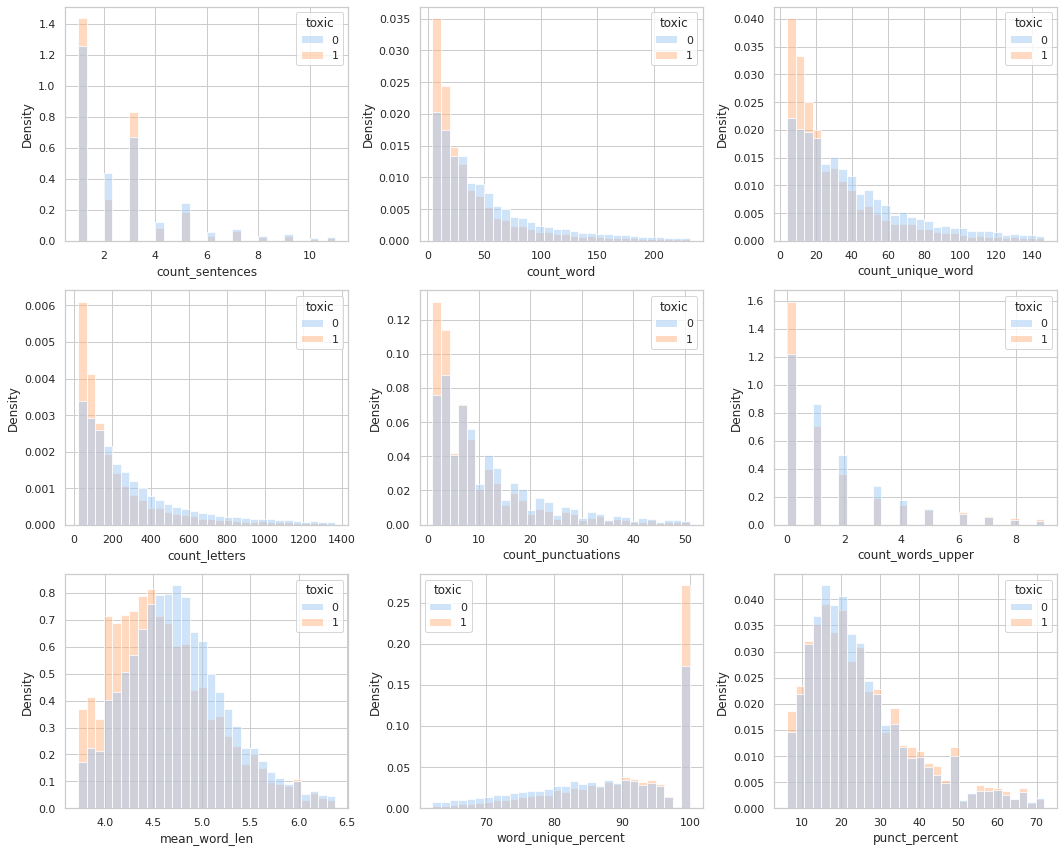

In [24]:
if is_final:
    fig = plt.figure(figsize=(15,12))
    for i, col_name in enumerate(list(tmp.columns[2:])):
        ax = plt.subplot(3,3,i+1)
        plot_two_box(col_name, ax)
    fig.tight_layout()

В целом видно, что в токсичных комментариях чуть меньше:
- слов
- уникальных слов
- букв
- пунктуации
- средняя длина слов

В то же время в токсичных комментариях больше процент уникальных слов (что, вероятно, определяется более короткими текстами).

Но сразу можно отметить, что эти закономерности выражены крайне слабо.

Посмотрим на хитмэп.

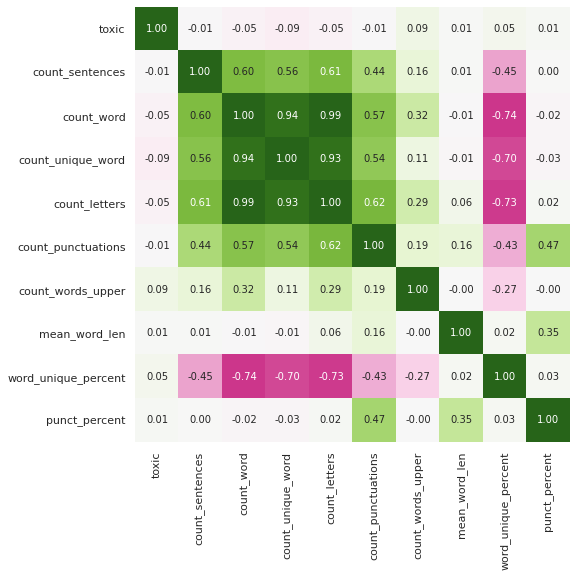

In [25]:
if is_final:
    tmp2 = tmp[tmp.columns[1:]]
    sns.heatmap(data=tmp2.corr(),
        square=True, cmap="PiYG",
        center=0,
        cbar=False,
        annot=True, fmt='.2f', annot_kws={'size': 10});

Видим, что для линейной модели все эти признаки бесполезны.

Посмотрим еще на нелинейную корреляцию.

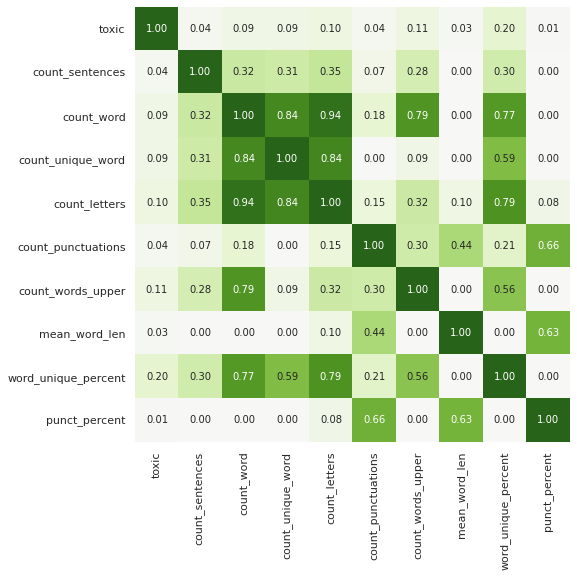

In [26]:
if is_final:
    tmp2 = tmp[tmp.columns[1:]]
    sns.heatmap(data=tmp2.phik_matrix(interval_cols=tmp2.columns),
        square=True, cmap="PiYG",
        center=0,
        cbar=False,
        annot=True, fmt='.2f', annot_kws={'size': 10});

Видим, что и тут все корреляции очень слабые. Вряд ли эти признаки стоит использовать для решения задачи.

## Предобработка

Напишем функцию "легкой" обработки текста.

Конкретные преобразования подобраны вручную после просмотра и индивидуальной обработки порядка 100 записей. Для повышения качества предсказаний можно добавлять новые "безопасные" преобразования, но придумывать их приходится самостоятельно.

In [27]:
def clean_light(data, col_in, col):
    data[col] = data[col_in].str.lower()

    # non-english characters to english
    data[col] = data[col].apply(unidecode)

    # URL lnks
    data[col] = data[col].str.replace(r'https?:\/\/\S+|www\.\S+', ' url ', regex=True)
    data[col] = data[col].str.replace(r'\S+\.html', ' url ', regex=True)
    # ip address
    data[col] = data[col].str.replace(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', ' ip address ', regex=True)

    data[col] = data[col].str.replace(r'ø', 'o', regex=True)
    data[col] = data[col].str.replace(r'f[^a-zA-Z]ck', 'fuck', regex=True)

    # domen-specific combinations
    data[col] = data[col].str.replace(r'user:\S+', '', regex=True)
    data[col] = data[col].str.replace(r'user talk:\S+', '', regex=True)
    data[col] = data[col].str.replace(r'image:\S+', '', regex=True)
    data[col] = data[col].str.replace(r'\(talk\)', '', regex=True)
    data[col] = data[col].str.replace(r'{talk contribs}', '', regex=True)
    data[col] = data[col].str.replace(r'\(utc\)', '', regex=True)
    data[col] = data[col].str.replace(r'\(more\.\.\.\)', '', regex=True)

    # punctuation
    data[col] = data[col].str.replace(r'\.\.', '...', regex=True)
    data[col] = data[col].str.replace(r'\.{4,}', '...', regex=True)
    data[col] = data[col].str.replace(r':+', ':', regex=True)
    data[col] = data[col].str.replace(r'\"+', '\"', regex=True)
    data[col] = data[col].str.replace(r'\'+', '\'', regex=True)

    # final cleaning
    data[col] = data[col].str.replace(r"[♣|§|♠|*|/|=|#|•|~|^|>|<|►|_|\]|\[|-|@]", ' ', regex=True)
    data[col] = data[col].str.replace(r'\n+', '\n', regex=True)
    data[col] = data[col].str.replace(r'[^\S\r\n]+', ' ', regex=True)
    # data[col] = data[col].str.replace(, regex=True)

    data[col] = data[col].str.strip()
    data[col] = data[col].str.strip('\'')
    data[col] = data[col].str.strip('\"')
    data[col] = data[col].str.strip(':')

    return data

Так как обработка минималистична, перезапишем исходный столбец.

In [28]:
%%time
df = clean_light(df, 'text', 'text')

CPU times: user 20.8 s, sys: 139 ms, total: 21 s
Wall time: 21 s


## Создание выборок

Разделим выборку на обучение и тест, создав отдельную колонку с этим признаком. Кроме того, индексы выборок запишем в отдельные переменные.

In [31]:
train_idx, test_idx = model_selection.train_test_split(
    df.index, test_size=0.2, shuffle=True, stratify=df['toxic'], random_state=random_state)
df['tst'] = 0
df.loc[test_idx, 'tst'] = 1

Сразу разделим обучающую выборку на "маленькую" обучающую и валидационную.

In [34]:
small_train_idx, small_val_idx = model_selection.train_test_split(
    train_idx, test_size=0.2, shuffle=True, stratify=df['toxic'].loc[train_idx], random_state=random_state)

Пара функций для обучения.

У нас несбалансированный датасет, поэтому метрика будет зависеть от порога принятия решения, и порог 0.5 может оказаться не лучшим. Поэтому сначала мы обучим модели на обучающей выборке, потом на этой же обучающей выборке подберем оптимальный порог, а потом применим эту модель с определенным порогом на тестовой выборке. При этом никаких утечек из тестовой выборки не будет.

In [35]:
def get_scores(model, df, feature_col_name, name=None, n_jobs=4):
    global result
    x1 = df[feature_col_name].loc[train_idx].fillna(' ').values
    x2 = df[feature_col_name].loc[test_idx].fillna(' ').values
    y1 = df['toxic'].loc[train_idx].values
    y2 = df['toxic'].loc[test_idx].values

    model.fit(x1, y1)
    try: print('vocab length', len(model['trans'].vocabulary_.keys()))
    except: print('no trans vocabulary_ in pipeline')

    p1 = model.predict_proba(x1)[:,1]
    p2 = model.predict_proba(x2)[:,1]

    best_i = 0
    best_f = 0
    x = []
    y = []
    for i in np.linspace(0.01, 0.99, 400):
        f = metrics.f1_score(y1, p1>i)
        x.append(i)
        y.append(f)
        if f > best_f:
            best_f = f
            best_i = i

    fig = plt.figure(figsize=(7,5))
    plt.plot(x, y)
    plt.xlabel('Threshold')
    plt.ylabel('F1-metrics')
    plt.title('F1 on threshold for ' + name)
    plt.show()

    res = dict(
        name=name,
        f1_train=metrics.f1_score(y1, p1>best_i),
        f1_test=metrics.f1_score(y2, p2>best_i)
    )
    return res

Создадим датафрейм, куда будем записывать результаты.

In [36]:
result = pd.DataFrame()

## Обучение классических моделей

### Мешок слов (bag of words - BOW)

Попробуем самый примитивный метод - вдруг получится. Для ускорения ограничим CountVectorizer так, чтобы он учитывал только слова, которые в датасете встречаются не менее 3 раз.

vocab length 45345


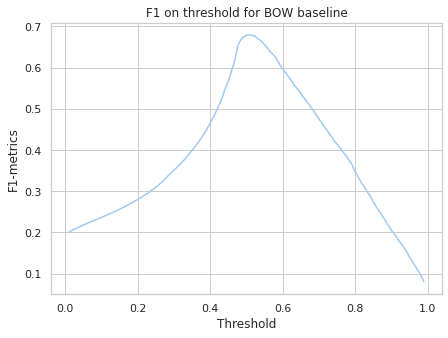

CPU times: user 1min 4s, sys: 280 ms, total: 1min 4s
Wall time: 1min 4s


,f1_test,f1_train,name
0,0.65568,0.67935,BOW baseline


In [44]:
%%time
model = pipeline.Pipeline([
    ('trans', feature_extraction.text.CountVectorizer(
        #max_df=0.4,
        min_df=3,
        #max_features=None,
        stop_words=stop_words,
        strip_accents='unicode',
        lowercase=True)
    ),
    ('est', linear_model.LogisticRegression(solver='sag', max_iter=300, class_weight={0:1, 1:3}))
])
res = get_scores(model, df, feature_col_name='text', name='BOW baseline');
result = result.append(res, ignore_index=True).drop_duplicates()
result

Ну, мы были близко.

Попробуем еще naive_bayes - пишут, что он хорошо подходит для классификации текстов.

vocab length 45345


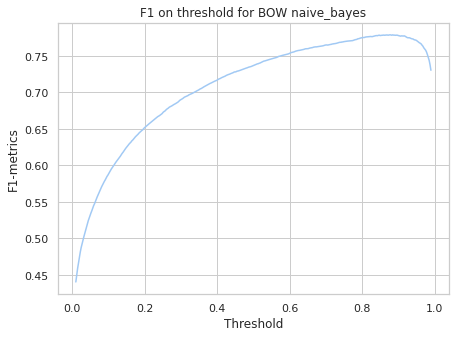

CPU times: user 25.6 s, sys: 63.9 ms, total: 25.6 s
Wall time: 25.6 s


,f1_test,f1_train,name
0,0.655680,0.679350,BOW baseline
1,0.737665,0.778877,BOW naive_bayes


In [45]:
%%time
model = pipeline.Pipeline([
    ('trans', feature_extraction.text.CountVectorizer(
        #max_df=0.4,
        min_df=3,
        #max_features=None,
        stop_words=stop_words,
        strip_accents='unicode',
        lowercase=True)
    ),
    ('est', naive_bayes.MultinomialNB(class_prior=[0.3, 0.1]))
])
res = get_scores(model, df, feature_col_name='text', name='BOW naive_bayes');
result = result.append(res, ignore_index=True).drop_duplicates()
result

Тоже работает, но как-то не очень хорошо.

### TF-IDF (Term frequency–inverse document frequency)

Для начала запустим просто на текстах без обработки. TF-IDF сам по себе снижает важность стоп-слов, поэтому не будем их включать явно.

vocab length 19902


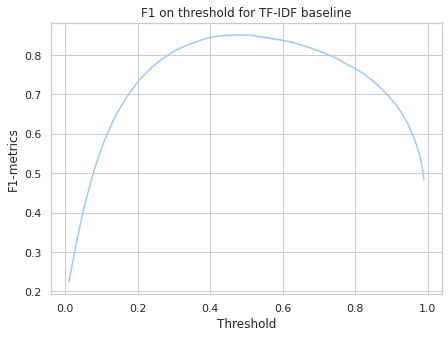

CPU times: user 30.7 s, sys: 188 ms, total: 30.9 s
Wall time: 31 s


,f1_test,f1_train,name
0,0.655680,0.679350,BOW baseline
1,0.737665,0.778877,BOW naive_bayes
2,0.791582,0.850960,TF-IDF baseline


In [46]:
%%time
model = pipeline.Pipeline([
    ('trans', feature_extraction.text.TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.6,
        min_df=10,
        # max_features=1000,
        # stop_words=stop_words,
        # ngram_range=(1,2),
        norm='l2',
        smooth_idf=True,
        strip_accents='unicode',
        lowercase=True)
    ),
    #('est', linear_model.LogisticRegression(solver='sag', class_weight='balanced'))
    ('est', linear_model.LogisticRegression(solver='sag', class_weight={0:1, 1:3}))
])
res = get_scores(model, df, feature_col_name='text', name='TF-IDF baseline')
result = result.append(res, ignore_index=True).drop_duplicates()
result

vocab length 19902


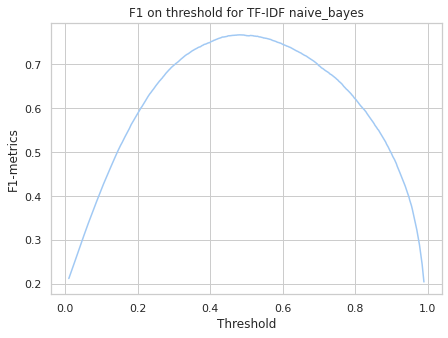

CPU times: user 26.8 s, sys: 180 ms, total: 27 s
Wall time: 27 s


,f1_test,f1_train,name
0,0.655680,0.679350,BOW baseline
1,0.737665,0.778877,BOW naive_bayes
2,0.791582,0.850960,TF-IDF baseline
3,0.735087,0.767130,TF-IDF naive_bayes


In [47]:
%%time
model = pipeline.Pipeline([
    ('trans', feature_extraction.text.TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.6,
        min_df=10,
        # max_features=1000,
        # stop_words=stop_words,
        # ngram_range=(1,2),
        norm='l2',
        smooth_idf=True,
        strip_accents='unicode',
        lowercase=True)
    ),
    ('est', naive_bayes.MultinomialNB(class_prior=[0.3, 0.1]))
])
res = get_scores(model, df, feature_col_name='text', name='TF-IDF naive_bayes')
result = result.append(res, ignore_index=True).drop_duplicates()
result

### Лемматизация

Попробуем немного почистить данные и сделать лемматизацию.

Будем использовать SpaCy как один самых мощных инструментов.

Загрузим пайплайн и посмотрим, из каких частей он состоит.

In [48]:
#!python -m spacy download en_core_web_md

In [49]:
nlp = spacy.load('en_core_web_md')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Нам не нужны парсер и Named Entity Recognition (NER). Остальные элементы необходимы для лемматизации.

In [50]:
nlp.disable_pipes('parser', 'ner');

Посмотрим, как работает лемматизатор.

In [51]:
doc = nlp(df['text'][6])

for token in doc:
    print(token.text, "-->", token.lemma_, 'vector shape', token.vector.shape)

leave --> leave vector shape (300,)
your --> your vector shape (300,)
emotions --> emotion vector shape (300,)
out --> out vector shape (300,)
of --> of vector shape (300,)
it --> it vector shape (300,)
. --> . vector shape (300,)
that --> that vector shape (300,)
is --> be vector shape (300,)
the --> the vector shape (300,)
exact --> exact vector shape (300,)
issue --> issue vector shape (300,)
i --> I vector shape (300,)
am --> be vector shape (300,)
having --> have vector shape (300,)
with --> with vector shape (300,)
the --> the vector shape (300,)
majority --> majority vector shape (300,)
of --> of vector shape (300,)
the --> the vector shape (300,)
information --> information vector shape (300,)
contained --> contain vector shape (300,)
within --> within vector shape (300,)
this --> this vector shape (300,)
article --> article vector shape (300,)
- --> - vector shape (300,)
emotional --> emotional vector shape (300,)
and --> and vector shape (300,)
speculative --> speculative vec

У каждого слова уже есть семантический вектор.

Лемматизатор не может обработать опечатки и, например, отсутствие пробелов между словами.

А теперь самое долгое - надо лемматизировать весь датасет.

In [52]:
def spacy_lemmatizer(x, nlp):
    mytokens = [word.lemma_.lower().strip() for word in nlp(x)]
    return ' '.join(mytokens)

Для ускорения после первого же расчета сохраняем текст в отдельный файл, а потом просто загружаем его.

In [56]:
%%time
lemma_file_name = 'lemmatized_df.csv'
if os.path.exists(lemma_file_name):
    lemmatized_df = pd.read_csv(lemma_file_name)
    if len(lemmatized_df) == len(df):
        print('Good lemmatized docs are already in file')
        df['lemmas'] = lemmatized_df['text']
    else:
        print('File alreasy exists, but wrong length')
        df['lemmas'] = df['text'].apply(lambda x: spacy_lemmatizer(x, nlp)).to_frame()
else:
    lemmatized_df = df['text'].apply(lambda x: spacy_lemmatizer(x, nlp)).to_frame()
    lemmatized_df.to_csv(lemma_file_name)
    df['lemmas'] = lemmatized_df['text']
    print('Lemmatized docs were saved to file')

Good lemmatized docs are already in file
CPU times: user 559 ms, sys: 100 ms, total: 659 ms
Wall time: 1.18 s


### TF-IDF (опять)

Все то же, что и раньше, но на лемматизированном датасете.

no trans vocabulary_ in pipeline


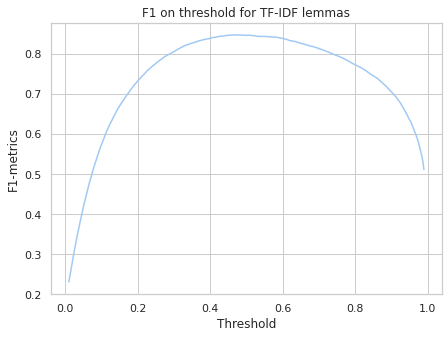

CPU times: user 3min 41s, sys: 2.29 s, total: 3min 43s
Wall time: 3min 43s


,f1_test,f1_train,name
0,0.655680,0.679350,BOW baseline
1,0.737665,0.778877,BOW naive_bayes
2,0.791582,0.850960,TF-IDF baseline
3,0.735087,0.767130,TF-IDF naive_bayes
4,0.796665,0.847182,TF-IDF lemmas
5,0.737500,0.765838,TF-IDF lemmas naive_bayes


In [62]:
%%time
model_log = pipeline.Pipeline([
    ('trans', feature_extraction.text.TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.6,
        min_df=10,
        # max_features=1000,
        # stop_words=stop_words,
        # ngram_range=(1,2),
        norm='l2',
        smooth_idf=True,
        strip_accents='unicode',
        lowercase=True)
    ),
    #('est', linear_model.LogisticRegression(solver='sag', class_weight='balanced'))
    ('est', linear_model.LogisticRegression(solver='sag', class_weight={0:1, 1:3}))
])

#c_space = np.logspace(-5, 8, 15) #"est__C": c_space, 
param_grid = {"est__penalty": ['l1', 'l2', 'elasticnet']}
logreg_cv = GridSearchCV(model_log, param_grid=param_grid, cv=5)
X_train = df['lemmas'].loc[train_idx].fillna(' ').values
y_train = df['toxic'].loc[train_idx].values
logreg_cv.fit(X_train,y_train)

res = get_scores(logreg_cv, df, feature_col_name='lemmas', name='TF-IDF lemmas')
result = result.append(res, ignore_index=True).drop_duplicates()
result

vocab length 15917


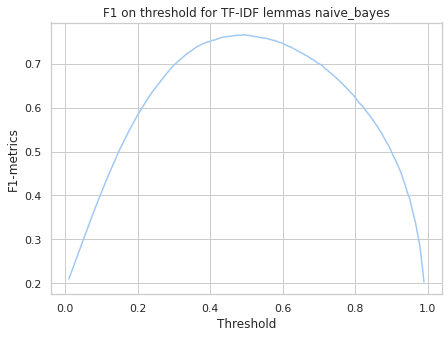

CPU times: user 29.8 s, sys: 99.9 ms, total: 29.9 s
Wall time: 29.9 s


,f1_test,f1_train,name
0,0.655680,0.679350,BOW baseline
1,0.737665,0.778877,BOW naive_bayes
2,0.791582,0.850960,TF-IDF baseline
3,0.735087,0.767130,TF-IDF naive_bayes
4,0.796665,0.847182,TF-IDF lemmas
5,0.737500,0.765838,TF-IDF lemmas naive_bayes


In [58]:
%%time
model = pipeline.Pipeline([
    ('trans', feature_extraction.text.TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.6,
        min_df=10,
        # max_features=1000,
        # stop_words=stop_words,
        # ngram_range=(1,2),
        norm='l2',
        smooth_idf=True,
        strip_accents='unicode',
        lowercase=True)
    ),
    ('est', naive_bayes.MultinomialNB(class_prior=[0.3, 0.1]))
])
res = get_scores(model, df, feature_col_name='lemmas', name='TF-IDF lemmas naive_bayes')
result = result.append(res, ignore_index=True).drop_duplicates()
result

## Выводы


- проведена предварительная "мягкая" очистка текста от частей, не поддающихся анализу: ссылок, IP, специальных символов и т.д.
- обучена логистическая регрессия и наивный Байес на мешке слов и на признаках TF-IDF до и после лемматизации. Лучший результат - логистическая регрессия на TF-IDF после лемматизации


Идеи для улучшения результата:
- использование BERT и дообучение его на тренировочном датасете
- более глубокая очистка текста. Требует просмотра записей и составления паттернов вручную. Сделано вручную частично, результат значительно улучшился. Потенциально может дать очень хороший прирост метрики и на простых, и на сложных моделях, но требует времени
- подбор гиперпараметров TF-IDF и логистической регрессии. Требует большого количества времени на перебор значений и кросс-валидацию. В работе сделано частично и вручную, дает незначительный прирост
- использование FastText для эффективной обработки слов с опечатками